In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

In [15]:
df_target = pd.read_csv("lucas_organic_carbon_target.csv")
df_test = pd.read_csv("lucas_organic_carbon_training_and_test_data.csv")

In [16]:
df_target.head()

,x
0,very_low
1,very_low
2,very_low
3,moderate
4,low


In [17]:
df_test.head()

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
0,0.000276,0.000278,0.000280,0.000281,0.000283,0.000284,0.000286,0.000288,0.000289,0.000291,...,-0.000070,-0.000068,-0.000065,-0.000063,-0.000060,-0.000058,-0.000056,-0.000053,-0.000051,-0.000048
1,0.000351,0.000353,0.000355,0.000357,0.000358,0.000360,0.000362,0.000364,0.000366,0.000368,...,-0.000041,-0.000038,-0.000036,-0.000034,-0.000031,-0.000029,-0.000026,-0.000024,-0.000022,-0.000019
2,0.000330,0.000331,0.000333,0.000335,0.000337,0.000339,0.000341,0.000343,0.000344,0.000346,...,-0.000086,-0.000084,-0.000081,-0.000079,-0.000076,-0.000074,-0.000072,-0.000069,-0.000067,-0.000064
3,0.000300,0.000303,0.000305,0.000307,0.000309,0.000312,0.000314,0.000316,0.000318,0.000320,...,-0.000109,-0.000105,-0.000100,-0.000096,-0.000092,-0.000088,-0.000084,-0.000080,-0.000076,-0.000072
4,0.000388,0.000390,0.000391,0.000393,0.000395,0.000397,0.000399,0.000401,0.000403,0.000405,...,-0.000076,-0.000074,-0.000072,-0.000070,-0.000067,-0.000065,-0.000063,-0.000061,-0.000059,-0.000057


## Task 1
#### Show the relative importance of input variables — Users want to understand the which input variables have the greatest impact on classification result

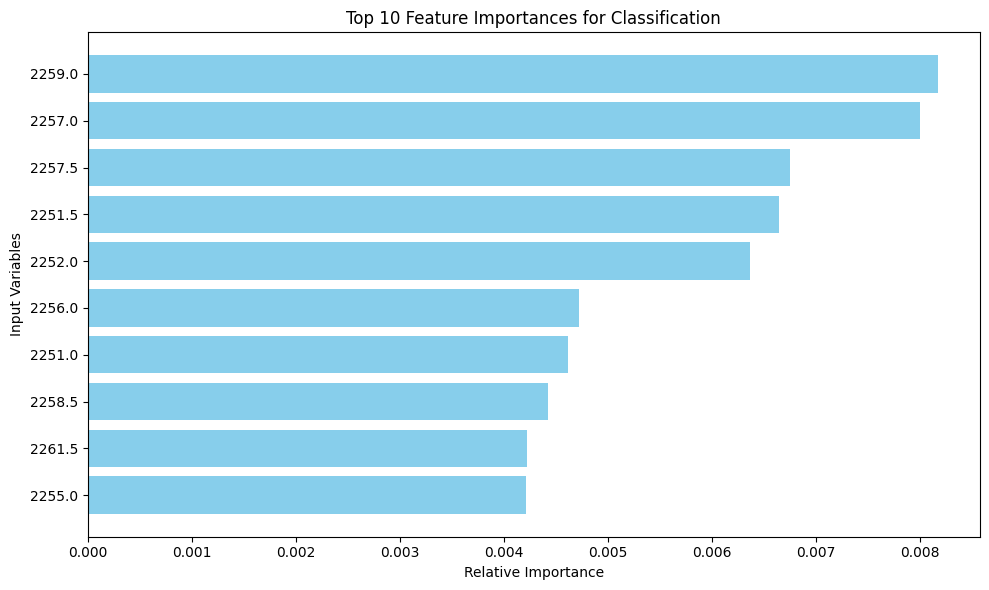

In [18]:
X = df_test  # Features
y = df_target['x']

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1][:10]  # Indizes der Top 10 Features

top_features = feature_names[sorted_indices]
top_importances = importances[sorted_indices]

# Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color="skyblue")
plt.xlabel("Relative Importance")
plt.ylabel("Input Variables")
plt.title("Top 10 Feature Importances for Classification")
plt.gca().invert_yaxis()  # Wichtigste oben anzeigen
plt.tight_layout()
plt.show()


## Task 2
#### Explore the impact of specific values of input variables to the classification process — users want to explore the impact of small intervals to the classification process


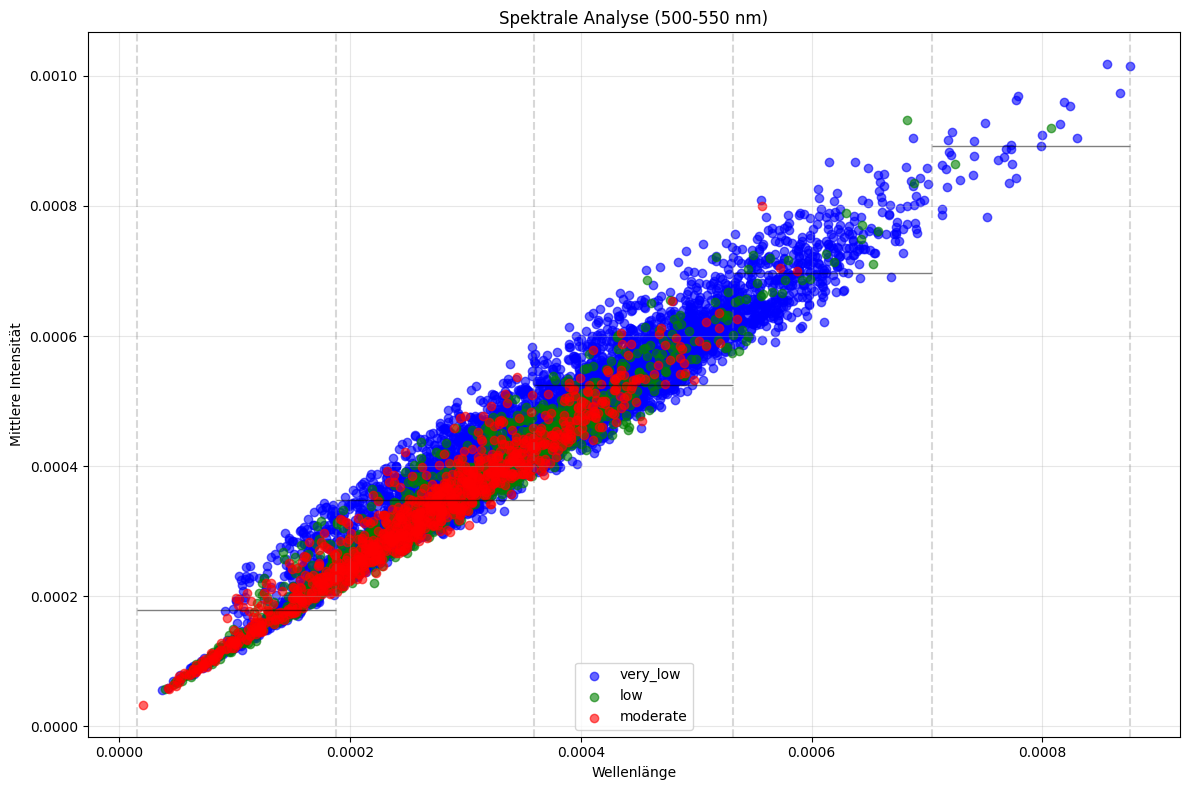

In [19]:
def plot_spectral_intervals(df_test, df_target, wavelength_range=(500, 550), num_intervals=5):
    """
    Parameters:
    df_test: DataFrame mit den spektralen Daten
    df_target: DataFrame mit den Zielkategorien
    wavelength_range: Tuple mit (start, end) für den Wellenlängenbereich
    num_intervals: Anzahl der gewünschten Intervalle
    """
    # Spalten im gewählten Wellenlängenbereich auswählen
    selected_columns = [col for col in df_test.columns 
                       if wavelength_range[0] <= float(col) <= wavelength_range[1]]
    
    # Mittelwert für jede Zeile im ausgewählten Bereich
    mean_values = df_test[selected_columns].mean(axis=1)
    
    # Erste Wellenlänge im Bereich für x-Achse
    x_values = df_test[selected_columns[0]]
    
    # Figure erstellen
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Scatter Plot mit Farben basierend auf Target
    colors = {'very_low': 'blue', 'low': 'green', 'moderate': 'red'}
    
    for category in colors:
        mask = df_target['x'] == category
        ax.scatter(x_values[mask], mean_values[mask], 
                  label=category, alpha=0.6, c=colors[category])
    
    # Intervalle erstellen
    x_min, x_max = x_values.min(), x_values.max()
    interval_width = (x_max - x_min) / num_intervals
    intervals = [(x_min + i*interval_width, x_min + (i+1)*interval_width) 
                for i in range(num_intervals)]
    
    # Intervalle visualisieren
    for start, end in intervals:
        # Vertikale Linien für Intervallgrenzen
        ax.axvline(x=start, color='gray', linestyle='--', alpha=0.3)
        
        # Punkte im aktuellen Intervall
        mask = (x_values >= start) & (x_values <= end)
        if any(mask):
            y_mean = mean_values[mask].mean()
            ax.hlines(y=y_mean, xmin=start, xmax=end, 
                     color='black', linewidth=1, alpha=0.5)
    
    ax.axvline(x=x_max, color='gray', linestyle='--', alpha=0.3)
    
    # Beschriftungen und Layout
    ax.set_xlabel('Wellenlänge')
    ax.set_ylabel('Mittlere Intensität')
    ax.set_title(f'Spektrale Analyse ({wavelength_range[0]}-{wavelength_range[1]} nm)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Funktion aufrufen für einen spezifischen Wellenlängenbereich
plot_spectral_intervals(df_test, df_target, 
                       wavelength_range=(500, 550),  # Sie können diesen Bereich anpassen
                       num_intervals=5)              # Anzahl der Intervalle anpassen

## Task 3
####  Explore interaction between two input variables and their relationships with the classification target — users want to understand if multiple input variables provide redundant information


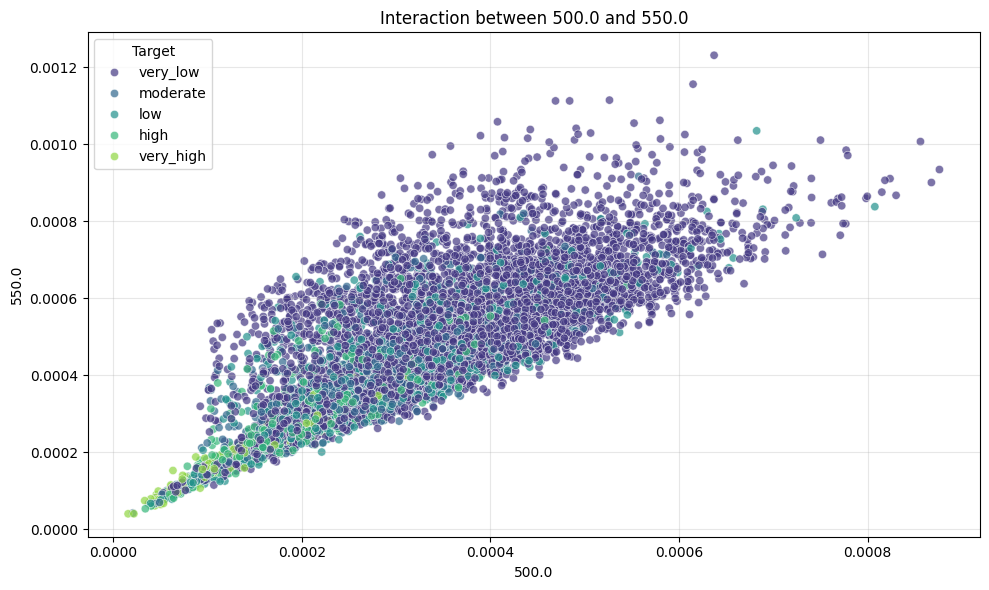

In [20]:
def plot_interaction(df_test, df_target, feature1, feature2):
    """
    Parameters:
    df_test: DataFrame with the input features
    df_target: DataFrame with the target variable
    feature1: The first feature to plot
    feature2: The second feature to plot
    """
    # Merge the features and target into a single DataFrame for plotting
    df_plot = df_test[[feature1, feature2]].copy()
    df_plot['target'] = df_target['x']
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_plot, x=feature1, y=feature2, hue='target', palette='viridis', alpha=0.7)
    
    # Add labels and title
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Interaction between {feature1} and {feature2}')
    plt.legend(title='Target')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage with two features
plot_interaction(df_test, df_target, feature1='500.0', feature2='550.0')

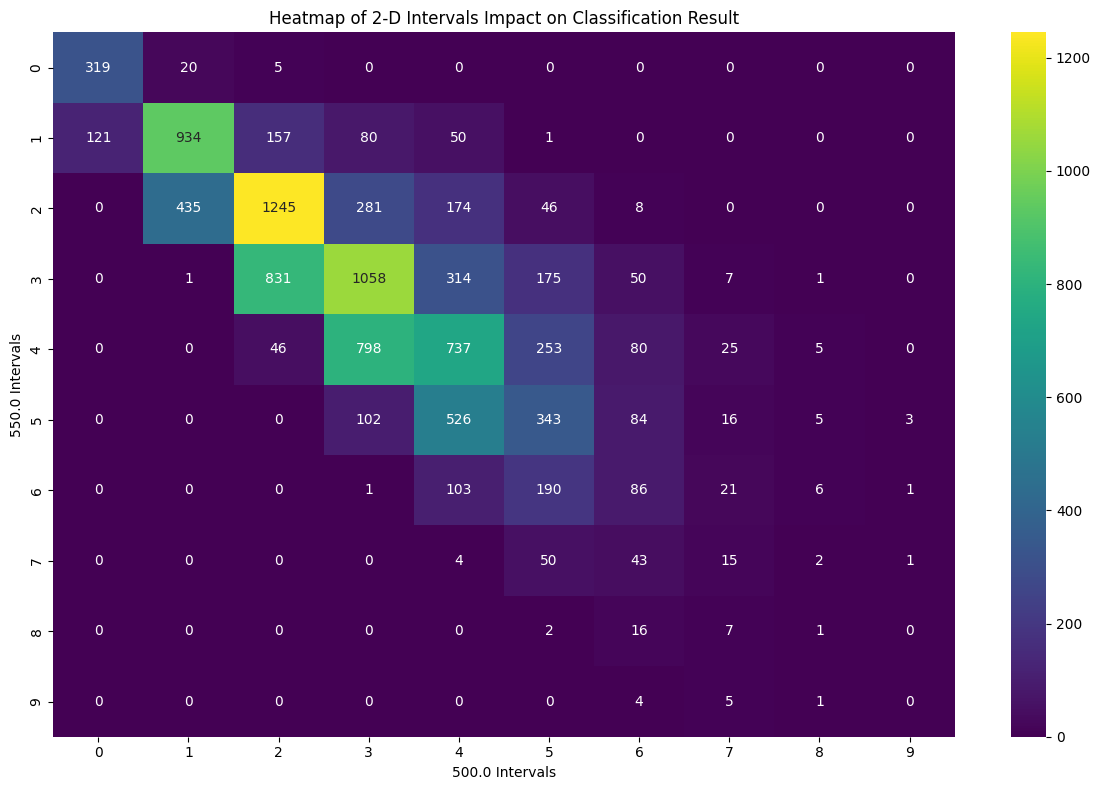

In [24]:
def plot_2d_intervals_heatmap(df_test, df_target, feature1, feature2, num_intervals=10):
    """
    Parameters:
    df_test: DataFrame with the input features
    df_target: DataFrame with the target variable
    feature1: The first feature to plot
    feature2: The second feature to plot
    num_intervals: Number of intervals for each feature
    """
    # Create intervals for both features
    feature1_min, feature1_max = df_test[feature1].min(), df_test[feature1].max()
    feature2_min, feature2_max = df_test[feature2].min(), df_test[feature2].max()
    
    feature1_intervals = pd.cut(df_test[feature1], bins=num_intervals, labels=False)
    feature2_intervals = pd.cut(df_test[feature2], bins=num_intervals, labels=False)
    
    # Create a DataFrame to store the interval data
    interval_data = pd.DataFrame({
        'feature1_interval': feature1_intervals,
        'feature2_interval': feature2_intervals,
        'target': df_target['x']
    })
    
    # Calculate the average impact within each 2-D interval
    heatmap_data = interval_data.groupby(['feature1_interval', 'feature2_interval']).size().unstack(fill_value=0)
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
    plt.xlabel(f'{feature1} Intervals')
    plt.ylabel(f'{feature2} Intervals')
    plt.title(f'Heatmap of 2-D Intervals Impact on Classification Result')
    plt.tight_layout()
    plt.show()

# Example usage with two features
plot_2d_intervals_heatmap(df_test, df_target, feature1='500.0', feature2='550.0', num_intervals=10)

## Task 4
####  Rank input variables according to their feature importance — Users want to sort the input variables according to their feature importance


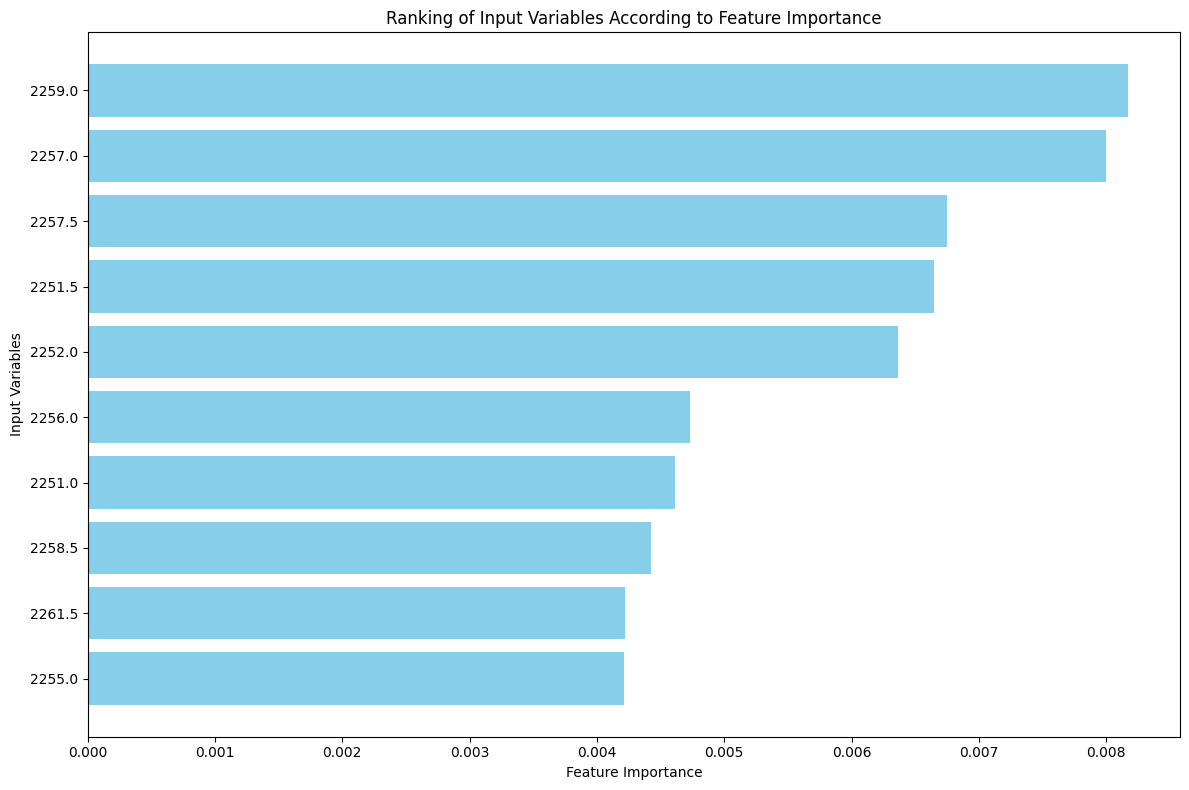

In [21]:
# Visualize the ranking of input variables according to their feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Input Variables")
plt.title("Ranking of Input Variables According to Feature Importance")
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.tight_layout()
plt.show()

## Task 5
#### Selection of input variables and intervals — Users want to choose specific input variables and specify interval ranges to explore the impact of changes in the interval to the classification result 

##### Texteingabe:

Verfügbare Features:
['500.0', '500.5', '501.0', '501.5', '502.0', '502.5', '503.0', '503.5', '504.0', '504.5', '505.0', '505.5', '506.0', '506.5', '507.0', '507.5', '508.0', '508.5', '509.0', '509.5', '510.0', '510.5', '511.0', '511.5', '512.0', '512.5', '513.0', '513.5', '514.0', '514.5', '515.0', '515.5', '516.0', '516.5', '517.0', '517.5', '518.0', '518.5', '519.0', '519.5', '520.0', '520.5', '521.0', '521.5', '522.0', '522.5', '523.0', '523.5', '524.0', '524.5', '525.0', '525.5', '526.0', '526.5', '527.0', '527.5', '528.0', '528.5', '529.0', '529.5', '530.0', '530.5', '531.0', '531.5', '532.0', '532.5', '533.0', '533.5', '534.0', '534.5', '535.0', '535.5', '536.0', '536.5', '537.0', '537.5', '538.0', '538.5', '539.0', '539.5', '540.0', '540.5', '541.0', '541.5', '542.0', '542.5', '543.0', '543.5', '544.0', '544.5', '545.0', '545.5', '546.0', '546.5', '547.0', '547.5', '548.0', '548.5', '549.0', '549.5', '550.0', '550.5', '551.0', '551.5', '552.0', '552.5', '553.0', '553.5', '554.0

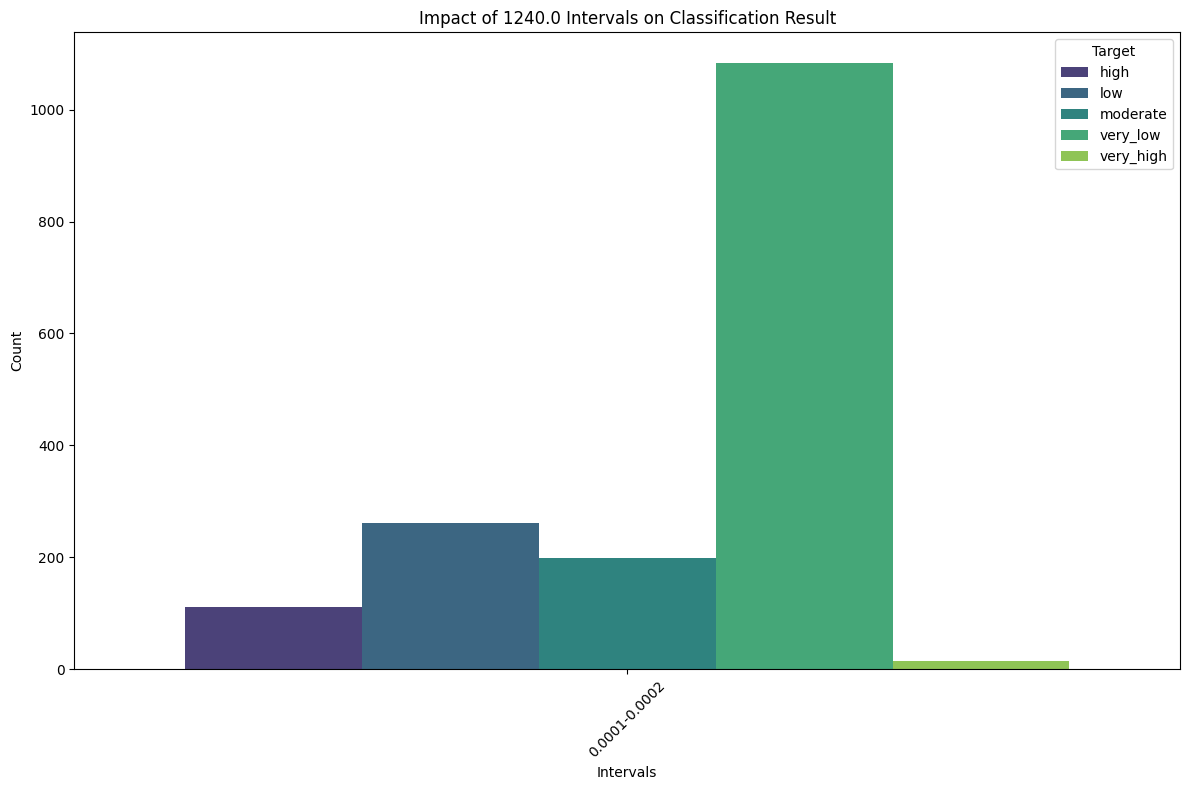

In [22]:
def explore_variable_intervals(df_test, df_target, feature, intervals):
    """
    Parameters:
    df_test: DataFrame with the input features
    df_target: DataFrame with the target variable
    feature: The feature to explore
    intervals: List of tuples representing the intervals to explore
    """
    # Extract the feature values
    feature_values = df_test[feature]
    
    # Create a list to store the results
    results_list = []
    
    for start, end in intervals:
        # Filter the data within the interval
        mask = (feature_values >= start) & (feature_values <= end)
        interval_data = df_test[mask]
        interval_target = df_target[mask]
        
        if not interval_data.empty:
            # Calculate the mean value of the feature within the interval
            mean_value = interval_data[feature].mean()
            
            # Append the results
            for target in interval_target['x'].unique():
                target_count = interval_target[interval_target['x'] == target].shape[0]
                results_list.append({
                    'Interval': f'{start}-{end}',
                    'Mean Value': mean_value,
                    'Target': target,
                    'Count': target_count
                })
    
    # Create DataFrame from results list
    results = pd.DataFrame(results_list)
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Interval', y='Count', hue='Target', data=results, palette='viridis')
    plt.xlabel('Intervals')
    plt.ylabel('Count')
    plt.title(f'Impact of {feature} Intervals on Classification Result')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return results

# Zeige verfügbare Features
print("Verfügbare Features:")
print(df_test.columns.tolist())

# User Input für Feature
selected_feature = input("Bitte geben Sie das gewünschte Feature ein: ")

# Überprüfe ob das Feature existiert
if selected_feature in df_test.columns:
    intervals_to_explore = [(0.0001, 0.0002), (0.0002, 0.0003), (0.0003, 0.0004), (0.0004, 0.0005)]
    explore_variable_intervals(df_test, df_target, feature=selected_feature, intervals=intervals_to_explore)
else:
    print(f"Fehler: Das Feature '{selected_feature}' existiert nicht im DataFrame.")

##### Schieberegler:

In [23]:
def explore_variable_intervals(df_test, df_target, feature, intervals):
    """
    Parameters:
    df_test: DataFrame with the input features
    df_target: DataFrame with the target variable
    feature: The feature to explore
    intervals: List of tuples representing the intervals to explore
    """
    # Extract the feature values
    feature_values = df_test[feature]
    
    # Create a list to store the results
    results_list = []
    
    for start, end in intervals:
        # Filter the data within the interval
        mask = (feature_values >= start) & (feature_values <= end)
        interval_data = df_test[mask]
        interval_target = df_target[mask]
        
        if not interval_data.empty:
            # Calculate the mean value of the feature within the interval
            mean_value = interval_data[feature].mean()
            
            # Append the results
            for target in interval_target['x'].unique():
                target_count = interval_target[interval_target['x'] == target].shape[0]
                results_list.append({
                    'Interval': f'{start}-{end}',
                    'Mean Value': mean_value,
                    'Target': target,
                    'Count': target_count
                })
    
    # Create DataFrame from results list
    results = pd.DataFrame(results_list)
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Interval', y='Count', hue='Target', data=results, palette='viridis')
    plt.xlabel('Intervals')
    plt.ylabel('Count')
    plt.title(f'Impact of {feature} Intervals on Classification Result')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return results

# Feature-Liste erstellen
features_list = df_test.columns.tolist()

# Slider für Feature-Auswahl erstellen
feature_slider = widgets.SelectionSlider(
    options=features_list,
    value=features_list[0],
    description='Feature:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout={'width': '600px'}  # Macht den Slider breiter
)

# Slider für Intervallgrenzen erstellen
interval_slider = widgets.FloatRangeSlider(
    value=[0.0001, 0.0005],
    min=0.0001,
    max=0.001,
    step=0.0001,
    description='Intervall:',
    continuous_update=False,
    readout_format='.4f',
    style={'description_width': 'initial'},
    layout={'width': '600px'}
)

# Button zum Aktualisieren erstellen
update_button = widgets.Button(
    description='Aktualisieren',
    style={'description_width': 'initial'}
)

# Output-Widget für die Plots
output = widgets.Output()

# Funktion die beim Klicken des Buttons ausgeführt wird
def on_button_click(b):
    with output:
        output.clear_output()
        selected_feature = feature_slider.value
        start, end = interval_slider.value
        step = (end - start) / 4  # 4 gleichmäßige Intervalle
        intervals = [(start + i*step, start + (i+1)*step) for i in range(4)]
        explore_variable_intervals(
            df_test, 
            df_target, 
            feature=selected_feature, 
            intervals=intervals
        )

update_button.on_click(on_button_click)

# Layout erstellen und anzeigen
display(widgets.VBox([
    feature_slider,
    interval_slider, 
    update_button, 
    output
]))